# **House Price Correlation study**

## Objectives

* Investigate correlation between the house attributes and the sale price.
* Enable the data to be presented to the customer.

## Inputs

* outputs/datasets/cleaned/HousePricesCleaned.csv

## Outputs

* Generate data plots to illustrate correlation in the streamlit app.


---

In [3]:
%pip install -r ../requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 5.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.6/150.6 kB 22.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 15.2 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of scipy to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 14.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 86.1 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 97.5 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 98.4 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/heritage-housing2/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/heritage-housing2'

In [ ]:
# import all necessary packages and libraries for the notebook
import os
import pandas as pd
from ydata_profiling import ProfileReport
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ppscore as pps
sns.set(style="whitegrid")

# Load collected data

In [4]:
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


## Investigate cleaned data file

* First we load the cleaned data file to have a quick overview of the input data.

In [1]:
import pandas as pd

# Corrected file path
df_raw_path = "/workspace/heritage-housing2/jupyter_notebooks/outputs/datasets/cleaned/HousePricesCleaned.csv" 

# Read the CSV file
df = pd.read_csv(df_raw_path)

# Display the first 5 rows
df.head(5)

1stFlrSF  2ndFlrSF  BedroomAbvGr BsmtExposure  BsmtFinSF1 BsmtFinType1  \
0       856     854.0      3.000000           No         706          GLQ   
1      1262       0.0      3.000000           Gd         978          ALQ   
2       920     866.0      3.000000           Mn         486          GLQ   
3       961       0.0      2.869214           No         216          ALQ   
4      1145       0.0      4.000000           Av         655          GLQ   

   BsmtUnfSF  GarageArea GarageFinish  GarageYrBlt  ...  LotArea LotFrontage  \
0        150         548          RFn       2003.0  ...     8450        65.0   
1        284         460          RFn       1976.0  ...     9600        80.0   
2        434         608          RFn       2001.0  ...    11250        68.0   
3        540         642          Unf       1998.0  ...     9550        60.0   
4        490         836          RFn       2000.0  ...    14260        84.0   

   MasVnrArea  OpenPorchSF  OverallCond  OverallQual  TotalBsmtSF  YearBuilt  \
0       196.0           61            5            7          856       2003   
1         0.0            0            8            6         1262       1976   
2       162.0           42            5            7          920       2001   
3         0.0           35            5            7          756       1915   
4       350.0           84            5            8         1145       2000   

   YearRemodAdd  SalePrice  
0          2003     208500  
1          1976     181500  
2          2002     223500  
3          1970     140000  
4          2000     250000  

[5 rows x 22 columns]

#### Generate data profile report

In [4]:
import pandas as pd
from ydata_profiling import ProfileReport

pandas_report = ProfileReport(df=df, minimal=True)
pandas_report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

We noticed that out of the 22 variables investigated (EnclosedPorch and WoodDeckSF are already dropped due to too high shage of missing values ~ 90% each),
we noticed the following variables with zeros which needs to be considered in upcoming steps.

* 2ndFlrSF has 867 (59.4%)   
* BsmtFinSF1 has 467 (32.0%) 
* BsmtUnfSF has 118 (8.1%)  
* GarageArea has 81 (5.5%)   
* MasVnrArea has 869 (59.5%) 
* OpenPorchSF has 656 (44.9%) 
* TotalBsmtSF has 37 (2.5%) 

In [8]:
pip install pandas seaborn scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.


## Initial heatmap and check data types
* We create a heatmap and a data type table to check the inital correlations and control which data types we have in our input data file.

All columns with their data types:
 1stFlrSF          int64
2ndFlrSF        float64
BedroomAbvGr    float64
BsmtExposure     object
BsmtFinSF1        int64
BsmtFinType1     object
BsmtUnfSF         int64
GarageArea        int64
GarageFinish     object
GarageYrBlt     float64
GrLivArea         int64
KitchenQual      object
LotArea           int64
LotFrontage     float64
MasVnrArea      float64
OpenPorchSF       int64
OverallCond       int64
OverallQual       int64
TotalBsmtSF       int64
YearBuilt         int64
YearRemodAdd      int64
SalePrice         int64
dtype: object

Converted float columns:
    2ndFlrSF  BedroomAbvGr  GarageYrBlt  LotFrontage  MasVnrArea
0       854             3         2003           65         196
1         0             3         1976           80           0
2       866             3         2001           68         162
3         0             3         1998           60           0
4         0             4         2000           84         350


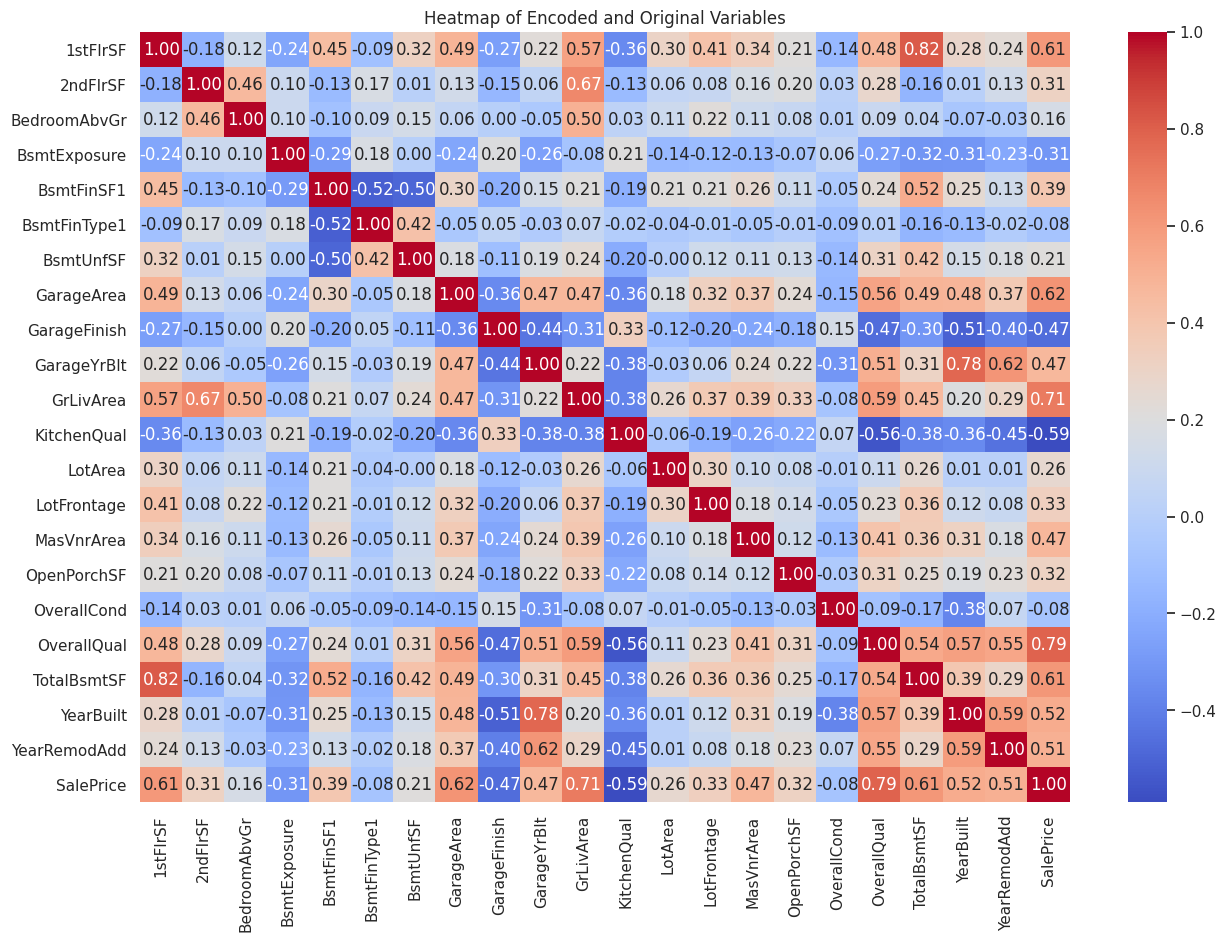

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load the dataset
file_path = "/workspace/heritage-housing2/jupyter_notebooks/outputs/datasets/cleaned/HousePricesCleaned.csv"
df = pd.read_csv(file_path)

# Display column names and their data types
print("All columns with their data types:\n", df.dtypes)

# Encode categorical variables
label_encoders = {}
categorical_columns = ['BsmtExposure', 'BsmtFinType1', 'GarageFinish', 'KitchenQual']
for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Convert float variables to integers
float_columns = df.select_dtypes(include=['float64']).columns.tolist()
for column in float_columns:
    df[column] = df[column].round().astype(int)

# Print converted float values for verification
print("\nConverted float columns:\n", df[float_columns].head())

# Prepare the data for heatmap
encoded_df = df.copy()

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(encoded_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Encoded and Original Variables')
plt.show()

### Initial conclusion: most significant variables to sale price simple and we have data types of integer, float and object.

* The most significant variables accordiong to first on the cleaned data file are (above 0.6)
    * 0.79 OverallQuall
    * 0.71 GrLivArea
    * 0.62 GarageArea
    * 0.61 1stFlrSF
    * 0.61 TotalBsmtSF

## Generate heatmap, trendlines and display ranking to sale price

             Variable   Pearson  Spearman  Abs_Pearson  Abs_Spearman  \
13        OverallQual  0.790982  0.809829     0.790982      0.809829   
7           GrLivArea  0.708624  0.731310     0.708624      0.731310   
5          GarageArea  0.623431  0.649379     0.623431      0.649379   
15          YearBuilt  0.522897  0.652682     0.522897      0.652682   
14        TotalBsmtSF  0.613581  0.602725     0.613581      0.602725   
0            1stFlrSF  0.605852  0.575408     0.605852      0.575408   
30     KitchenQual_TA -0.519298 -0.581803     0.519298      0.581803   
16       YearRemodAdd  0.507101  0.571159     0.507101      0.571159   
6         GarageYrBlt  0.466754  0.563256     0.466754      0.563256   
27   GarageFinish_Unf -0.439573 -0.529975     0.439573      0.529975   
10         MasVnrArea  0.472614  0.415906     0.472614      0.415906   
22   BsmtFinType1_GLQ  0.400764  0.423896     0.400764      0.423896   
29     KitchenQual_Gd  0.321641  0.478583     0.321641      0.47

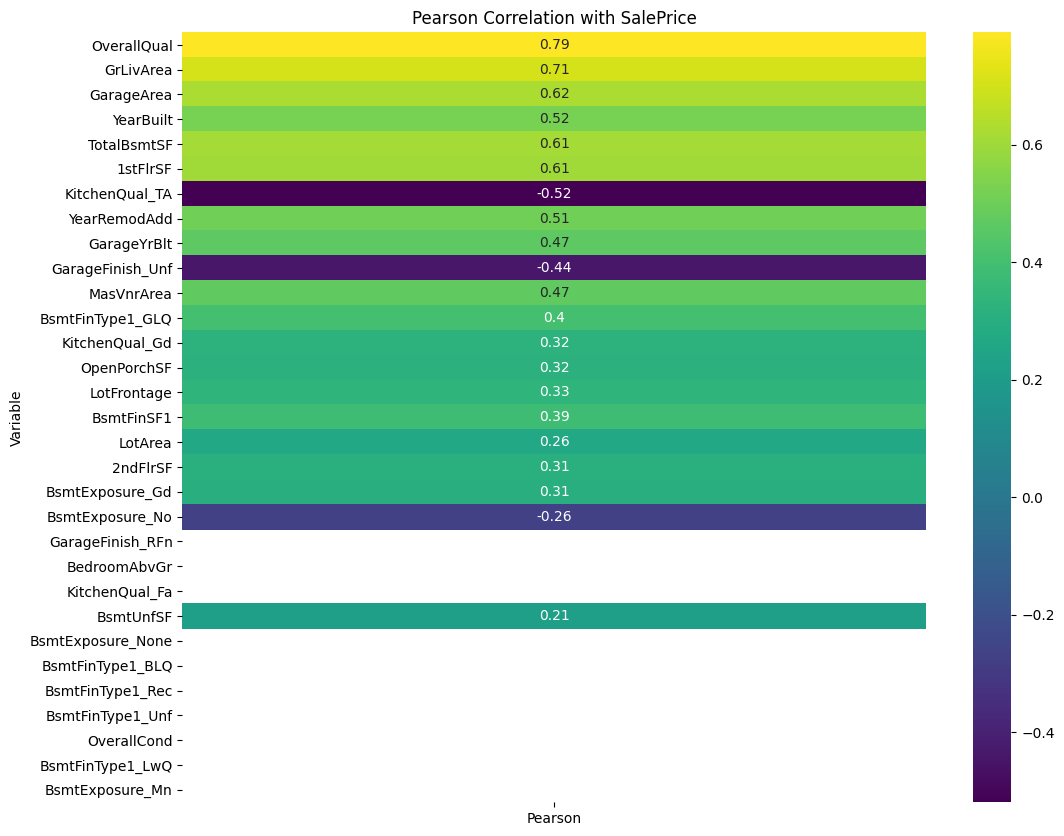

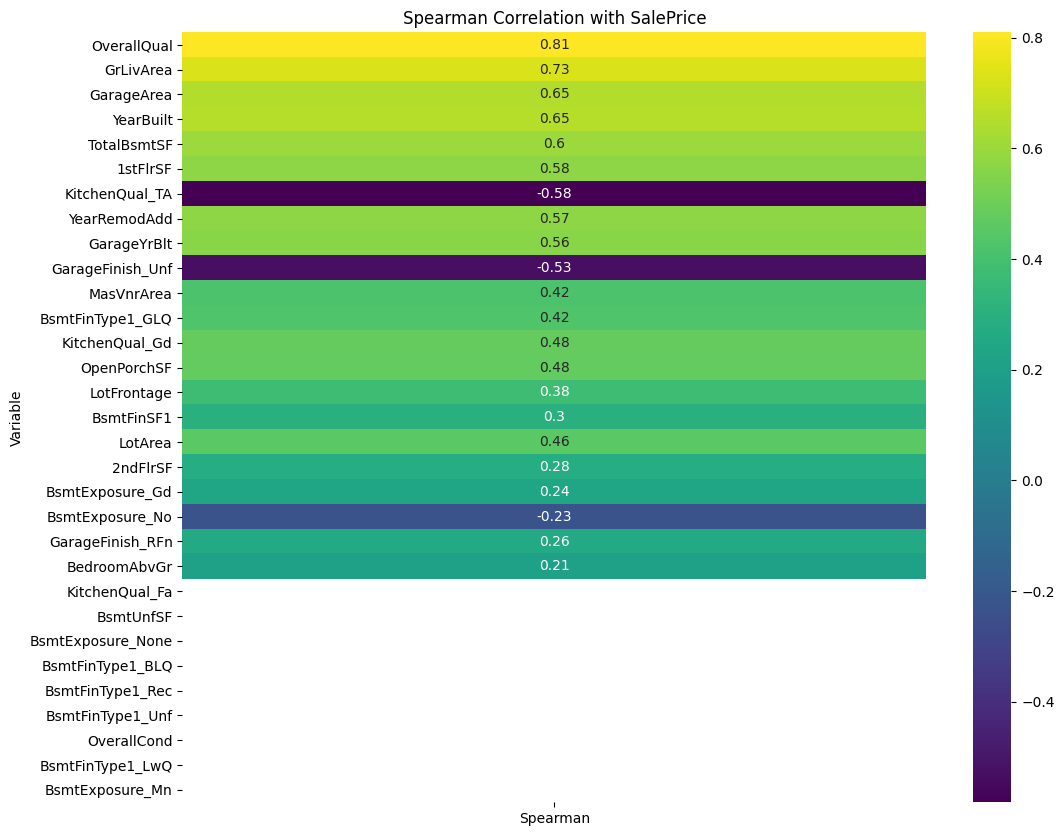

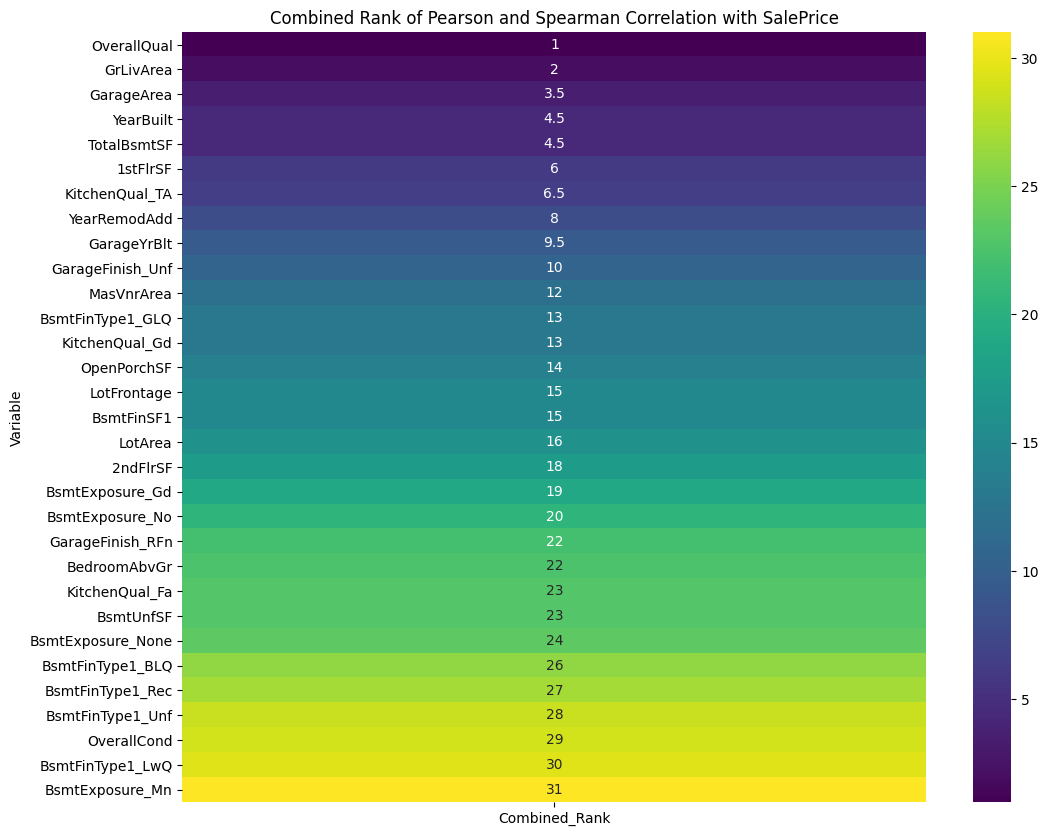

In [5]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, spearmanr
import seaborn as sns
import matplotlib.pyplot as plt

categorical_vars = df.select_dtypes(include=['object']).columns.tolist()
numeric_vars = df.select_dtypes(include=[np.number]).columns.tolist()

df_encoded = pd.get_dummies(df, columns=categorical_vars, drop_first=True)

# Ensure 'SalePrice' is included in the numeric variables
numeric_vars = df_encoded.select_dtypes(include=[np.number]).columns.tolist()
if 'SalePrice' not in numeric_vars:
    numeric_vars.append('SalePrice')

correlations = {'Variable': [], 'Pearson': [], 'Spearman': []}


for var in numeric_vars:
    if var != 'SalePrice':  # Exclude the target variable itself
        x = df_encoded[var]
        y = df_encoded['SalePrice']
        
        pearson_coef, _ = pearsonr(x, y)
        spearman_coef, _ = spearmanr(x, y)
        
        correlations['Variable'].append(var)
        correlations['Pearson'].append(pearson_coef)
        correlations['Spearman'].append(spearman_coef)

# Create a DataFrame with the correlation results
correlation_df = pd.DataFrame(correlations)
correlation_df['Abs_Pearson'] = correlation_df['Pearson'].abs()
correlation_df['Abs_Spearman'] = correlation_df['Spearman'].abs()

# Rank the variables based on absolute correlations
correlation_df['Pearson_Rank'] = correlation_df['Abs_Pearson'].rank(ascending=False)
correlation_df['Spearman_Rank'] = correlation_df['Abs_Spearman'].rank(ascending=False)
correlation_df['Combined_Rank'] = (correlation_df['Pearson_Rank'] + correlation_df['Spearman_Rank']) / 2

# Sort the DataFrame based on the combined rank
correlation_df.sort_values(by='Combined_Rank', inplace=True)
print(correlation_df)

# Extract the most related variable
most_related_variable = correlation_df.iloc[0]['Variable']
print(f"The most related variable to SalePrice is: {most_related_variable}")


def create_heatmap(df, title, threshold, figsize=(12, 10), font_annot=10):
    mask = np.zeros_like(df, dtype=bool)
    mask[abs(df) < threshold] = True
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(df, annot=True, mask=mask, cmap='viridis', annot_kws={"size": font_annot}, ax=ax)
    plt.title(title)
    plt.show()


correlation_df.set_index('Variable', inplace=True)
heatmap_data_pearson = correlation_df[['Pearson']]
heatmap_data_spearman = correlation_df[['Spearman']]
heatmap_data_combined = correlation_df[['Combined_Rank']]

create_heatmap(heatmap_data_pearson, 'Pearson Correlation with SalePrice', threshold=0.2)
create_heatmap(heatmap_data_spearman, 'Spearman Correlation with SalePrice', threshold=0.2)
create_heatmap(heatmap_data_combined, 'Combined Rank of Pearson and Spearman Correlation with SalePrice', threshold=0.2)


#### Display the most relevant house attributes to the sale price

In [6]:
top_n = 6

# Extract the top_n variables based on Combined Rank
top_combined_vars = correlation_df.nsmallest(top_n, 'Combined_Rank').index.to_list()

# Create the vars_to_study set from the top_combined_vars list
vars_to_study = set(top_combined_vars)

print("Variables to study based on top Combined Rank:", vars_to_study)

Variables to study based on top Combined Rank: {'TotalBsmtSF', 'OverallQual', '1stFlrSF', 'GrLivArea', 'GarageArea', 'YearBuilt'}


In [7]:
df_eda = df.filter(list(vars_to_study) + ['SalePrice'])
df_eda.head(5)

TotalBsmtSF  OverallQual  1stFlrSF  GrLivArea  GarageArea  YearBuilt  \
0          856            7       856       1710         548       2003   
1         1262            6      1262       1262         460       1976   
2          920            7       920       1786         608       2001   
3          756            7       961       1717         642       1915   
4         1145            8      1145       2198         836       2000   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000

---

## Display view of Pearson and Spearman correlation per variable.

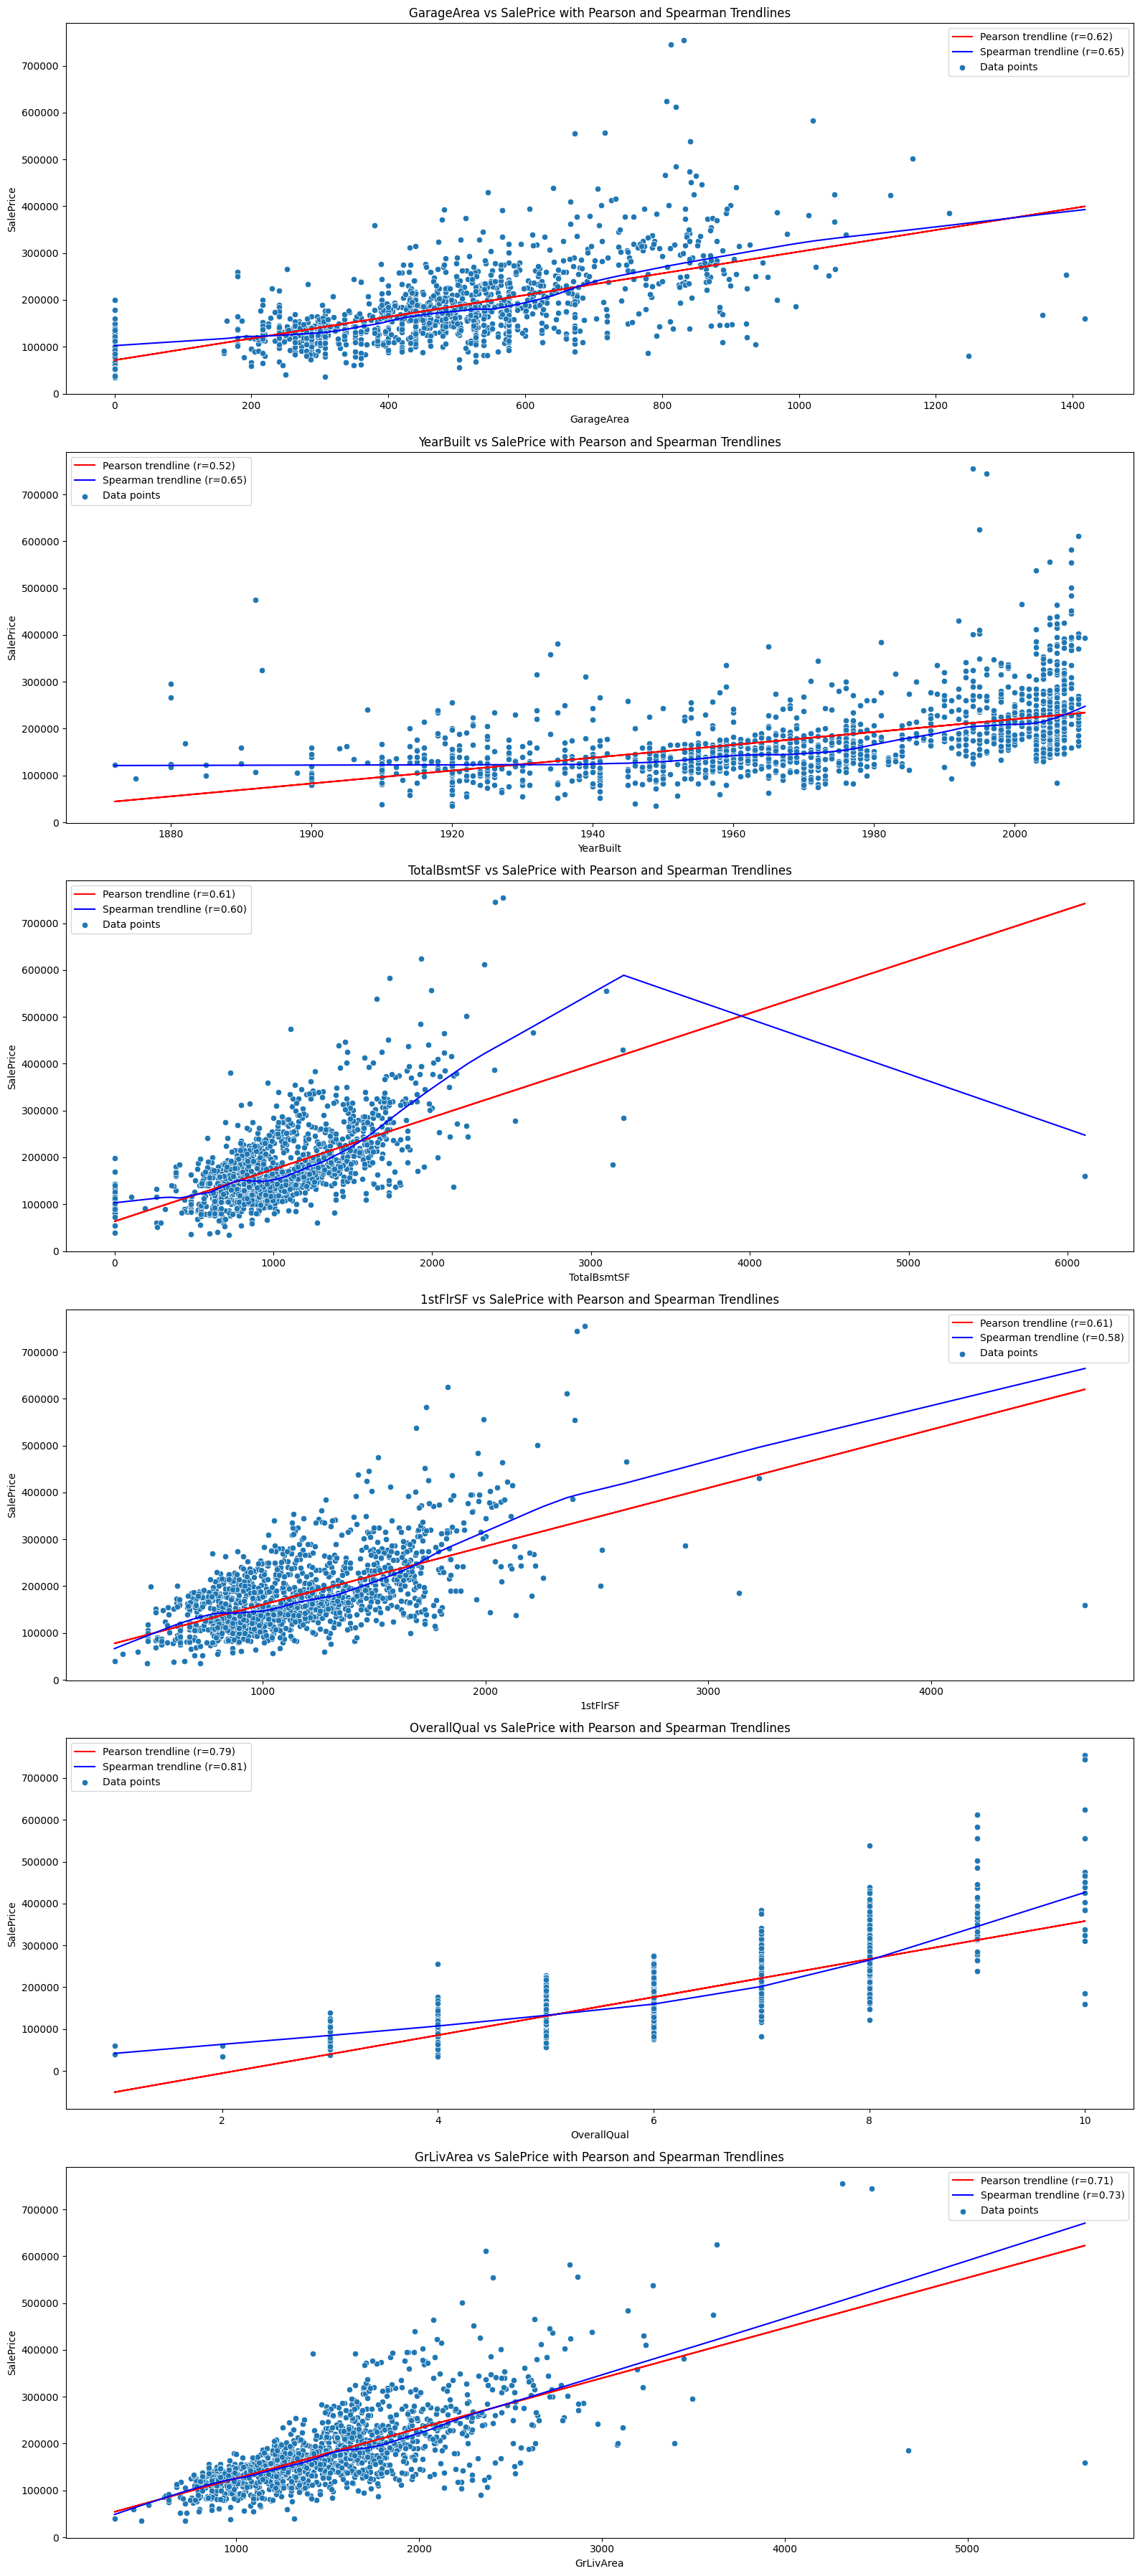

* We observed a specific instance where the Spearman plot for TotalBsmtSF appears to be overfitted. In the next step, we will display trendlines based on either Pearson or Spearman correlations, selecting the one that best represents the development and the most likely future trend.

# Display trendlines in streamlit app

* In the section below, we generate trendlines that provide a comprehensive visualization of the correlation between selected house attributes and sale price.

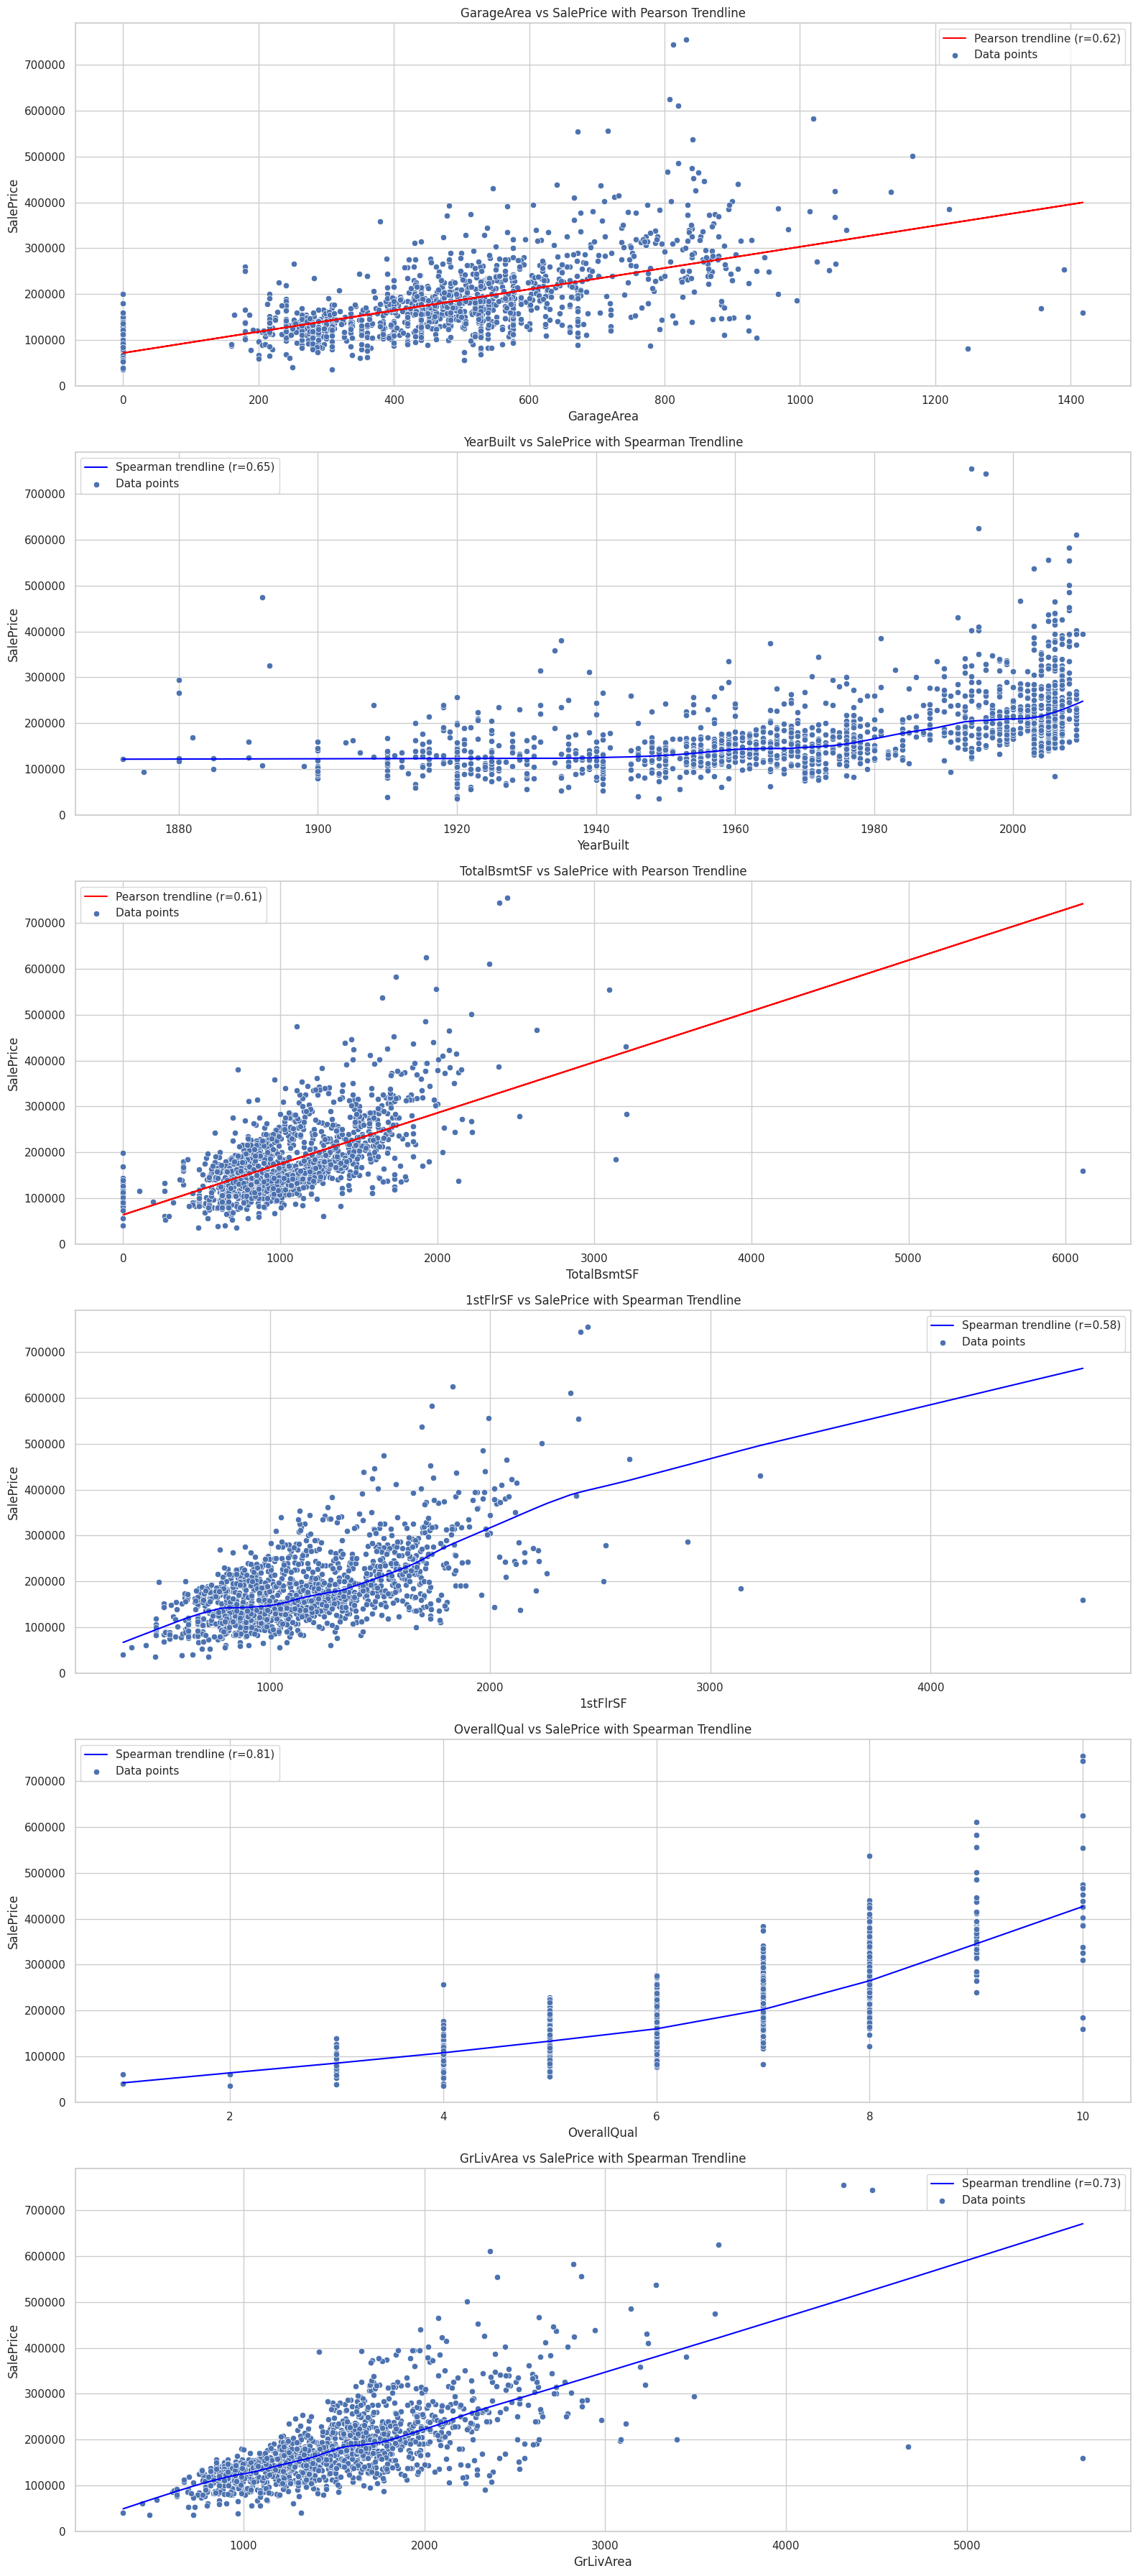

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr, linregress
from statsmodels.nonparametric.smoothers_lowess import lowess

# Function to plot a variable against SalePrice with specified correlation method for each variable
def plot_with_custom_trendlines(df, vars, correlation_methods, target='SalePrice'):
    num_vars = len(vars)
    plt.figure(figsize=(16, 6 * num_vars))
    
    for i, (var, corr_method) in enumerate(zip(vars, correlation_methods), 1):
        x = df[var]
        y = df[target]
        
       
        if corr_method == 'Pearson':
            coef, _ = pearsonr(x, y)
            slope, intercept, _, _, _ = linregress(x, y)
            line = slope * x + intercept
        elif corr_method == 'Spearman':
            coef, _ = spearmanr(x, y)
            lowess_smoothed = lowess(y, x, frac=0.3)
        
        plt.subplot(num_vars, 1, i)
        sns.scatterplot(x=x, y=y, label='Data points')
        
        if corr_method == 'Pearson':
            plt.plot(x, line, color='red', label=f'{corr_method} trendline (r={coef:.2f})')
        elif corr_method == 'Spearman':
            plt.plot(lowess_smoothed[:, 0], lowess_smoothed[:, 1], color='blue', label=f'{corr_method} trendline (r={coef:.2f})')
        
        plt.xlabel(var)
        plt.ylabel(target)
        plt.title(f'{var} vs {target} with {corr_method} Trendline')
        plt.legend()
    
    plt.tight_layout()
    plt.show()


variables = ['GarageArea', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF', 'OverallQual', 'GrLivArea']
correlation_methods = ['Pearson', 'Spearman', 'Pearson', 'Spearman', 'Spearman', 'Spearman']
plot_with_custom_trendlines(df, variables, correlation_methods)

## Conclusion and next steps
* The following variables are the most relevant, they all have a value or 0.6 for either Spearman or Pearson correlation.
    * OverallQual   
    * GrLivArea  
    * GarageArea   
    * TotalBsmtSF  
    * YearBuilt  
    * 1stFlrSF
    
* In the next notebook (FeatureEngineering), we will conduct a detailed feature engineering analysis to evaluate their potential as predictors for the sale price.
